## Correlation between the RV of current 10 mins and the target. 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sys
sys.path.append("../")
import importlib

from proj_mod import data_processing
importlib.reload(data_processing);

In [4]:
path_book="../raw_data/kaggle_ORVP/book_train.parquet"

In [5]:
df_train=pd.read_csv("../raw_data/kaggle_ORVP/train.csv")

In [6]:
df_train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [7]:
len_train=len(df_train)

In [12]:
df_train["row_id"]=df_train["stock_id"].astype(str)+"-"+df_train["time_id"].astype(str)

In [13]:
df_train

,stock_id,time_id,target,row_id
0,0,5,0.004136,0-5
1,0,11,0.001445,0-11
2,0,16,0.002168,0-16
3,0,31,0.002195,0-31
4,0,62,0.001747,0-62
...,...,...,...,...
428927,126,32751,0.003461,126-32751
428928,126,32753,0.003113,126-32753
428929,126,32758,0.004070,126-32758
428930,126,32763,0.003357,126-32763


# Load in the precalculated RV values (see data_processing_functions.ipynb)

In [8]:
df_RV=pd.read_csv("../processed_data/RV_by_row_id.csv")

In [9]:
df_RV

,row_id,RV
0,0-5,0.004499
1,0-11,0.001204
2,0-16,0.002369
3,0-31,0.002574
4,0-62,0.001894
...,...,...
428927,99-32751,0.001436
428928,99-32753,0.001795
428929,99-32758,0.001658
428930,99-32763,0.002213


In [14]:
df_extended=pd.merge(df_train,df_RV,on="row_id")

In [15]:
df_extended

,stock_id,time_id,target,row_id,RV
0,0,5,0.004136,0-5,0.004499
1,0,11,0.001445,0-11,0.001204
2,0,16,0.002168,0-16,0.002369
3,0,31,0.002195,0-31,0.002574
4,0,62,0.001747,0-62,0.001894
...,...,...,...,...,...
428927,126,32751,0.003461,126-32751,0.003691
428928,126,32753,0.003113,126-32753,0.004104
428929,126,32758,0.004070,126-32758,0.003118
428930,126,32763,0.003357,126-32763,0.003661


<Axes: title={'center': 'target to RV of current 10 mins'}, xlabel='RV', ylabel='target'>

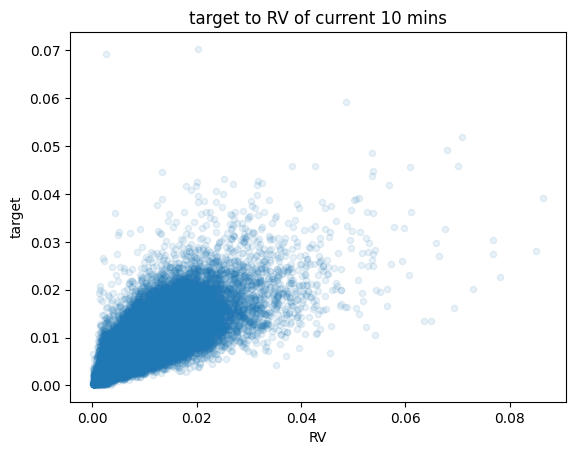

In [43]:
df_extended.plot.scatter(x="RV",y="target",title="target to RV of current 10 mins",alpha=0.1)

In [19]:
df_extended[["target","RV"]].corr()

,target,RV
target,1.000000,0.873777
RV,0.873777,1.000000


Evidently, there is significant correlation between the target and the current RV. But the spread is not very indicative. 

<Axes: title={'center': 'target to RV of current 10 mins for stock 0'}, xlabel='RV', ylabel='target'>

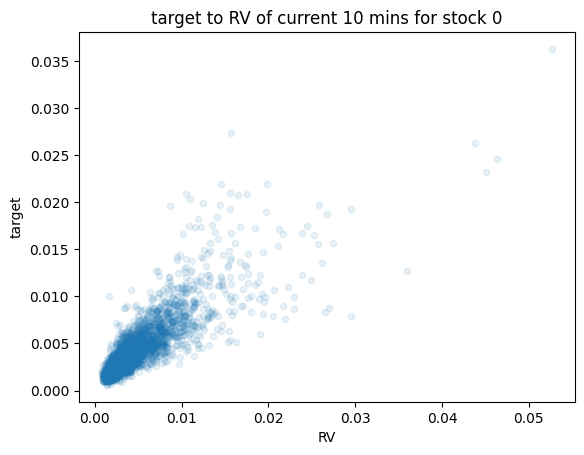

In [44]:
df_extended[df_extended["stock_id"]==0].plot.scatter(x="RV",y="target",title="target to RV of current 10 mins for stock 0",alpha=0.1)

In [21]:
df_extended[df_extended["stock_id"]==0][["target","RV"]].corr()

,target,RV
target,1.000000,0.840606
RV,0.840606,1.000000


Although the correlation reduced, the spread seems "tighter". 

<Axes: title={'center': 'target to RV of current 10 mins for time 5'}, xlabel='RV', ylabel='target'>

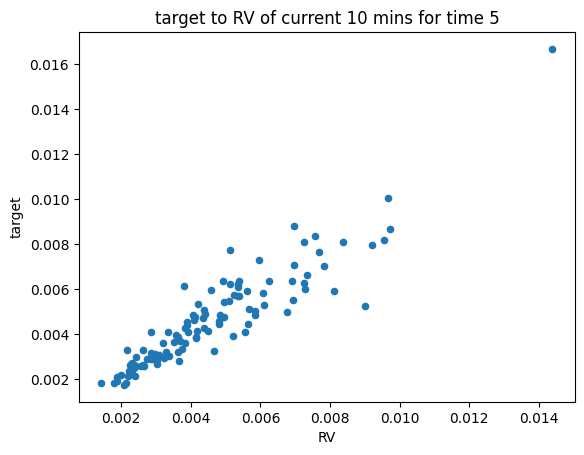

In [22]:
df_extended[df_extended["time_id"]==5].plot.scatter(x="RV",y="target",title="target to RV of current 10 mins for time 5")

In [25]:
df_extended[df_extended["time_id"]==5][["target","RV"]].corr()

,target,RV
target,1.000000,0.918001
RV,0.918001,1.000000


This is much more significant.

We also want to see this across all of the stock id and time ids, not just one of them. 

In [28]:
df_corr_by_stock=df_extended.groupby("stock_id")[["target","RV"]].corr()

In [29]:
df_corr_by_stock

target        RV
stock_id                           
0        target  1.000000  0.840606
         RV      0.840606  1.000000
1        target  1.000000  0.847510
         RV      0.847510  1.000000
2        target  1.000000  0.881656
...                   ...       ...
124      RV      0.882409  1.000000
125      target  1.000000  0.877262
         RV      0.877262  1.000000
126      target  1.000000  0.834651
         RV      0.834651  1.000000

[224 rows x 2 columns]

In [38]:
avg_corr_by_stock=(df_corr_by_stock["RV"].sum()-len(df_corr_by_stock)/2)/(len(df_corr_by_stock)/2)

In [39]:
avg_corr_by_stock

np.float64(0.8570502134452056)

The average of all correlation grouped by stock id is slightly higher than that of native. 

In [30]:
df_corr_by_time=df_extended.groupby("time_id")[["target","RV"]].corr()

In [31]:
df_corr_by_time

target        RV
time_id                           
5       target  1.000000  0.918001
        RV      0.918001  1.000000
11      target  1.000000  0.822928
        RV      0.822928  1.000000
16      target  1.000000  0.804232
...                  ...       ...
32758   RV      0.733892  1.000000
32763   target  1.000000  0.595437
        RV      0.595437  1.000000
32767   target  1.000000  0.782757
        RV      0.782757  1.000000

[7660 rows x 2 columns]

In [40]:
avg_corr_by_time=(df_corr_by_time["RV"].sum()-len(df_corr_by_time)/2)/(len(df_corr_by_time)/2)

In [41]:
avg_corr_by_time

np.float64(0.8418139301097685)

The average correlation grouped by time is roughly the same as native. 